# Linear Algebra with examples using Numpy

In [1]:
import numpy as np
from numpy.random import randn as randn
from numpy.random import randint as randint

## Linear Algebra and Machine Learning
* Ranking web pages in order of importance
    * Solved as the problem of finding the eigenvector of the page score matrix
* Dimensionality reduction - Principal Component Analysis
* Movie recommendation
    * Use singular value decomposition (SVD) to break down user-movie into user-feature and movie-feature matrices, keeping only the top $k$-ranks to identify the best matches
* Topic modeling
    * Extensive use of SVD and matrix factorization can be found in Natural Language Processing, specifically in topic modeling and semantic analysis

## Vectors

A vector can be represented by an array of real numbers

$$\mathbf{x} = [x_1, x_2, \ldots, x_n]$$

Geometrically, a vector specifies the coordinates of the tip of the vector if the tail were placed at the origin

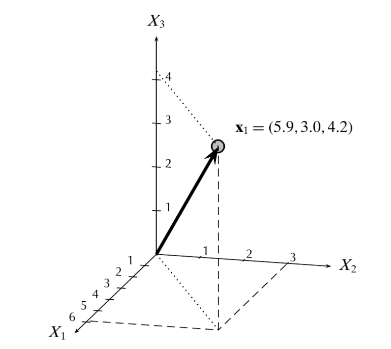

In [2]:
from IPython.display import Image
Image('../src/images/vector.png')

In [3]:
x = np.array([[5.9,3.0,4.2]])
print(x)
print(x.shape)

[[5.9 3.  4.2]]
(1, 3)


The norm of a vector $\mathbf{x}$ is defined by

$$||\boldsymbol{x}|| = \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2}$$

In [4]:
print(np.sqrt(np.sum(x**2)))
print(np.linalg.norm(x))

7.8390050389064045
7.8390050389064045


Adding a constant to a vector adds the constant to each element


$$a + \boldsymbol{x} = [a + x_1, a + x_2, \ldots, a + x_n]$$

In [5]:
a = 4
print(x)
print(a + x)

[[5.9 3.  4.2]]
[[9.9 7.  8.2]]


Multiplying a vector by a constant multiplies each term by the constant.


$$a \boldsymbol{x} = [ax_1, ax_2, \ldots, ax_n]$$

In [6]:
print(x)
print(x*4)
print(np.linalg.norm(x*4))
#print np.linalg.norm(x)

[[5.9 3.  4.2]]
[[23.6 12.  16.8]]
31.356020155625618


If we have two vectors $\boldsymbol{x}$ and $\boldsymbol{y}$ of the same length $(n)$, then the _dot product_ is give by

$$\boldsymbol{x} \cdot \boldsymbol{y} = x_1y_1 + x_2y_2 + \cdots + x_ny_n$$

In [7]:
x = np.array([1, 2, 3, 4])
y = np.array([4, 3, 2, 1])
print(x)
print(y)
print(np.dot(x,y))

[1 2 3 4]
[4 3 2 1]
20


If $\mathbf{x} \cdot \mathbf{y} = 0$ then $x$ and $y$ are *orthogonal* (aligns with the intuitive notion of perpindicular)

In [8]:
w = np.array([1, 2])
v = np.array([-2, 1])
np.dot(w,v)

0

The norm squared of a vector is just the vector dot product with itself
$$
||x||^2 = x \cdot x
$$

In [9]:
print(x)
print np.linalg.norm(x)**2
print np.dot(x,x)

SyntaxError: invalid syntax (<ipython-input-9-d2241607c4bc>, line 2)

The distance between two vectors is the norm of the difference.
$$
d(x,y) = ||x-y||
$$

In [ ]:
np.linalg.norm(x-y)

_Cosine Similarity_ is the cosine of the angle between the two vectors give by

$$cos(\theta) = \frac{\boldsymbol{x} \cdot \boldsymbol{y}}{||\boldsymbol{x}|| \text{ } ||\boldsymbol{y}||}$$



In [ ]:
x = np.array([1,2,3,4])
y = np.array([5,6,7,8])
np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

If both $\boldsymbol{x}$ and $\boldsymbol{y}$ are zero-centered, this calculation is the _correlation_ between $\boldsymbol{x}$ and $\boldsymbol{y}$

In [10]:
from scipy.stats import pearsonr
x_centered = x - np.mean(x)
y_centered = y - np.mean(y)
# The following gives the "Centered Cosine Similarity"
# ... which is equivelent to the "Sample Pearson Correlation Coefficient"
# ... (in the correlation case, we're interpreting the vector as a list of samples)
# ... see: https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient#For_a_sample
r1 = np.dot(x_centered,y_centered)/(np.linalg.norm(x_centered)*np.linalg.norm(y_centered))
r2 = pearsonr(x_centered,y_centered)
print(r1,r2[0])

-0.9999999999999998 -1.0


### Linear Combinations of Vectors

If we have two vectors $\boldsymbol{x}$ and $\boldsymbol{y}$ of the same length $(n)$, then

$$\boldsymbol{x} + \boldsymbol{y} = [x_1+y_1, x_2+y_2, \ldots, x_n+y_n]$$

In [ ]:
x = np.array([1,2,3,4])
y = np.array([5,6,7,8])
print(x+y)

In [ ]:
a=2
x = np.array([1,2,3,4])
print(a*x)

A _linear combination_ of a collection of vectors $(\boldsymbol{x}_1,
                                                    \boldsymbol{x}_2, \ldots,
                                                    \boldsymbol{x}_m)$ 
is a vector of the form

$$a_1 \cdot \boldsymbol{x}_1 + a_2 \cdot \boldsymbol{x}_2 + 
\cdots + a_m \cdot \boldsymbol{x}_m$$
                                                

In [ ]:
a1=2
x1 = np.array([1,2,3,4])
print a1*x1
a2=4
x2 = np.array([5,6,7,8])
print(a2*x2)
print(a1*x1 + a2*x2)

# Matrices

An $n \times p$ matrix is an array of numbers with $n$ rows and $p$ columns:

$$
X =
  \begin{bmatrix}
    x_{11} & x_{12} & \cdots & x_{1p} \\
    x_{21} & x_{22} & \cdots & x_{2p} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & \cdots & x_{np} 
  \end{bmatrix}
$$

$n$ = the number of subjects  
$p$ = the number of features

For the following $2 \times 3$ matrix
$$
X =
  \begin{bmatrix}
    1 & 2 & 3\\
    4 & 5 & 6
  \end{bmatrix}
$$

We can create in Python using NumPY

In [ ]:
X = np.array([[1,2,3],[4,5,6]])
print(X[1, 2])
print(X)
print(X.shape)

### Basic Properties
Let $X$ and $Y$ be matrices **of the dimension $n \times p$**. Let $x_{ij}$ $y_{ij}$ for $i=1,2,\ldots,n$ and $j=1,2,\ldots,p$ denote the entries in these matrices, then

1. $X+Y$ is the matrix whose $(i,j)^{th}$ entry is $x_{ij} + y_{ij}$
2. $X-Y$ is the matrix whose $(i,j)^{th}$ entry is $x_{ij} - y_{ij}$
3. $aX$, where $a$ is any real number, is the matrix whose $(i,j)^{th}$ entry is $ax_{ij}$ 

In [ ]:
X = np.array([[1,2,3],[4,5,6]])
print(X)
Y = np.array([[7,8,9],[10,11,12]])
print(Y)
print(X+Y)

In [ ]:
X = np.array([[1,2,3],[4,5,6]])
print(X)
Y = np.array([[7,8,9],[10,11,12]])
print(Y)
print(X-Y)

In [ ]:
X = np.array([[1,2,3],[4,5,6]])
print(X)
a=5
print(a*X)

In order to multiply two matrices, they must be _conformable_ such that the number of columns of the first matrix must be the same as the number of rows of the second matrix.

Let $X$ be a matrix of dimension $n \times k$ and let $Y$ be a matrix of dimension $k \times p$, then the product $XY$ will be a matrix of dimension $n \times p$ whose $(i,j)^{th}$ element is given by the dot product of the $i^{th}$ row of $X$ and the $j^{th}$ column of $Y$

$$\sum_{s=1}^k x_{is}y_{sj} = x_{i1}y_{1j} + \cdots + x_{ik}y_{kj}$$




### Note: 

$$XY \neq YX$$

If $X$ and $Y$ are square matrices of the same dimension, then the both the product $XY$ and $YX$ exist; however, there is no guarantee the two products will be the same


In [ ]:
X = np.array([[2,1,0],[-1,2,3]])
print(X)
Y = np.array([[0,-2],[1,2],[1,1]])
print(Y)

# Matrix multiply with dot operator
print(np.dot(X,Y))
print(X.dot(Y))

In [ ]:
# Regular multiply operator is just element-wise multiplication
print(X)
print(Y.transpose())
print(X*Y.T)

### Additional Properties of Matrices
1. If $X$ and $Y$ are both $n \times p$ matrices,
then $$X+Y = Y+X$$
2. If $X$, $Y$, and $Z$ are all $n \times p$ matrices,
then $$X+(Y+Z) = (X+Y)+Z$$
3. If $X$, $Y$, and $Z$ are all conformable,
then $$X(YZ) = (XY)Z$$
4. If $X$ is of dimension $n \times k$ and $Y$ and $Z$ are of dimension $k \times p$, then $$X(Y+Z) = XY + XZ$$
5. If $X$ is of dimension $p \times n$ and $Y$ and $Z$ are of dimension $k \times p$, then $$(Y+Z)X = YX + ZX$$
6. If $a$ and $b$ are real numbers, and $X$ is an $n \times p$ matrix,
then $$(a+b)X = aX+bX$$
7. If $a$ is a real number, and $X$ and $Y$ are both $n \times p$ matrices,
then $$a(X+Y) = aX+aY$$
8. If $z$ is a real number, and $X$ and $Y$ are conformable, then
$$X(aY) = a(XY)$$

### Matrix Transpose

The transpose of an $n \times p$ matrix is a $p \times n$ matrix with rows and columns interchanged

$$
X^T =
  \begin{bmatrix}
    x_{11} & x_{12} & \cdots & x_{1n} \\
    x_{21} & x_{22} & \cdots & x_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{p1} & x_{p2} & \cdots & x_{pn} 
  \end{bmatrix}
$$



In [ ]:
print(X)
X_T = X.transpose()
print(X_T)
print(X_T.shape)

### Properties of Transpose
1. Let $X$ be an $n \times p$ matrix and $a$ a real number, then 
$$(cX)^T = cX^T$$
2. Let $X$ and $Y$ be $n \times p$ matrices, then
$$(X \pm Y)^T = X^T \pm Y^T$$
3. Let $X$ be an $n \times k$ matrix and $Y$ be a $k \times p$ matrix, then
$$(XY)^T = Y^TX^T$$

### Vector in Matrix Form
A column vector is a matrix with $n$ rows and 1 column and to differentiate from a standard matrix $X$ of higher dimensions can be denoted as a bold lower case $\boldsymbol{x}$

$$
\boldsymbol{x} =
  \begin{bmatrix}
    x_{1}\\
    x_{2}\\
    \vdots\\
    x_{n}
  \end{bmatrix}
$$

In numpy, when we enter a vector, it will not normally have the second dimension, so we can reshape it

In [ ]:
x = np.array([1,2,3,4])
print(x)
print(x.shape)

In [ ]:
y = x.reshape(4,1)
z = x[:,np.newaxis]
print(y)
print(z)
print(y.shape)
print(z.shape)

and a row vector is generally written as the transpose

$$\boldsymbol{x}^T = [x_1, x_2, \ldots, x_n]$$

In [ ]:
x_T = y.transpose()
print(x_T)
print(x_T.shape)
print(x)

If we have two vectors $\boldsymbol{x}$ and $\boldsymbol{y}$ of the same length $(n)$, then the _dot product_ is give by matrix multiplication

$$\boldsymbol{x}^T \boldsymbol{y} =   
    \begin{bmatrix} x_1& x_2 & \ldots & x_n \end{bmatrix}
    \begin{bmatrix}
    y_{1}\\
    y_{2}\\
    \vdots\\
    y_{n}
  \end{bmatrix}  =
  x_1y_1 + x_2y_2 + \cdots + x_ny_n$$

## Inverse of a Matrix

The inverse of a square $n \times n$ matrix $X$ is an $n \times n$ matrix $X^{-1}$ such that 

$$X^{-1}X = XX^{-1} = I$$

Where $I$ is the identity matrix, an $n \times n$ diagonal matrix with 1's along the diagonal. 

If such a matrix exists, then $X$ is said to be _invertible_ or _nonsingular_, otherwise $X$ is said to be _noninvertible_ or _singular_.

In [6]:
import numpy as np
X = np.array([[1,2,3], [0,1,0], [-2, -1, 0]],dtype=float)
Y = np.linalg.inv(X)
print(X)
print(np.round(Y.dot(X)))
#print(np.allclose(X,Y.dot(X)))

[[ 1.  2.  3.]
 [ 0.  1.  0.]
 [-2. -1.  0.]]
[[ 1.  0. -0.]
 [ 0.  1.  0.]
 [ 0. -0.  1.]]


### Properties of Inverse
1. If $X$ is invertible, then $X^{-1}$ is invertible and
$$(X^{-1})^{-1} = X$$
2. If $X$ and $Y$ are both $n \times n$ invertible matrices, then $XY$ is invertible and
$$(XY)^{-1} = Y^{-1}X^{-1}$$
3. If $X$ is invertible, then $X^T$ is invertible and
$$(X^T)^{-1} = (X^{-1})^T$$

### Orthogonal Matrices

Let $X$ be an $n \times n$ matrix such than $X^TX = I$, then $X$ is said to be orthogonal which implies that $X^T=X^{-1}$

This is equivalent to saying that the columns of $X$ are all orthogonal to each other (and have unit length).

## Matrix Equations

A system of equations of the form:
\begin{align*}
    a_{11}x_1 + \cdots + a_{1n}x_n &= b_1 \\
    \vdots \hspace{1in} \vdots \\
    a_{m1}x_1 + \cdots + a_{mn}x_n &= b_m 
\end{align*}
can be written as a matrix equation:
$$
A\mathbf{x} = \mathbf{b}
$$
and hence, has solution
$$
\mathbf{x} = A^{-1}\mathbf{b}
$$

## Eigenvectors and Eigenvalues

Let $A$ be an $n \times n$ matrix and $\boldsymbol{x}$ be an $n \times 1$ nonzero vector. An _eigenvalue_ of $A$ is a number $\lambda$ such that

$$A \boldsymbol{x} = \lambda \boldsymbol{x}$$


A vector $\boldsymbol{x}$ satisfying this equation is called an eigenvector associated with $\lambda$

Eigenvectors and eigenvalues will play a huge roll in matrix methods later in the course (PCA, SVD, NMF).

In [ ]:
A = np.array([[1, 1], [1, 2]])
vals, vecs = np.linalg.eig(A)
print(vals)
print(vecs)

In [ ]:
lam = vals[0]
vec = vecs[:,0]
print(A.dot(vec))
print(lam * vec)